In [8]:
from libraries_.Grad_Desc_training_ import Grad_Desc_training_
from libraries_.f_sigmoid import f_sigmoid
from libraries_.neural_model_ import neural_model
from libraries_.ini_network import ini_network
from libraries_.cost_fun_rmse_reg_ import cost_fun_rmse_reg_
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# Generar datos de entrada y salida
x1 = np.arange(-1, 1, 0.01)
y = 4 * x1 * np.sin(10 * x1) + x1 * np.exp(x1) * np.cos(20 * x1)

# Organizar datos en forma de tabla
X = x1.reshape(-1, 1)
Y = y.reshape(-1, 1)

# Cargar los archivos CSV en DataFrames
df_W1 = pd.read_csv('W1.csv', header=None)  # Ajusta el nombre del archivo según corresponda
df_W2 = pd.read_csv('W2.csv', header=None)
df_W3 = pd.read_csv('W3.csv', header=None)
df_b1 = pd.read_csv('b1.csv', header=None)
df_b2 = pd.read_csv('b2.csv', header=None)
df_b3 = pd.read_csv('b3.csv', header=None)

# Convertir el DataFrame a una matriz de numpy
W1 = df_W1.to_numpy()  
W2 = df_W2.to_numpy()
W3 = df_W3.to_numpy()
b1 = df_b1.to_numpy()
b2 = df_b2.to_numpy()
b3 = df_b3.to_numpy()



params = ini_network(X, Y, [10, 5])  
params.hidden_fun[0] = f_sigmoid 
params.eta = 0.1


# Actualizar los valores de W y b con los valores cargados
params.W[0] = W1
params.W[1] = W2
params.W[2] = W3
params.b[0] = b1
params.b[1] = b2
params.b[2] = b3
#
# # Obtener estimación de la red neuronal
Yhat, _ = neural_model(X, params)

#
# Calcular la función de costo RMSE
J, _, _, _ = cost_fun_rmse_reg_(Y, Yhat, params)

# Entrenamiento de la red neuronal
n_iter = 5000
params, model = Grad_Desc_training_(X, Y, params, n_iter)
#
# Los resultados finales se encuentran en model.inputs[-1]
Y2 = model.inputs[-1]

The loss function or gradient reach the desired values.


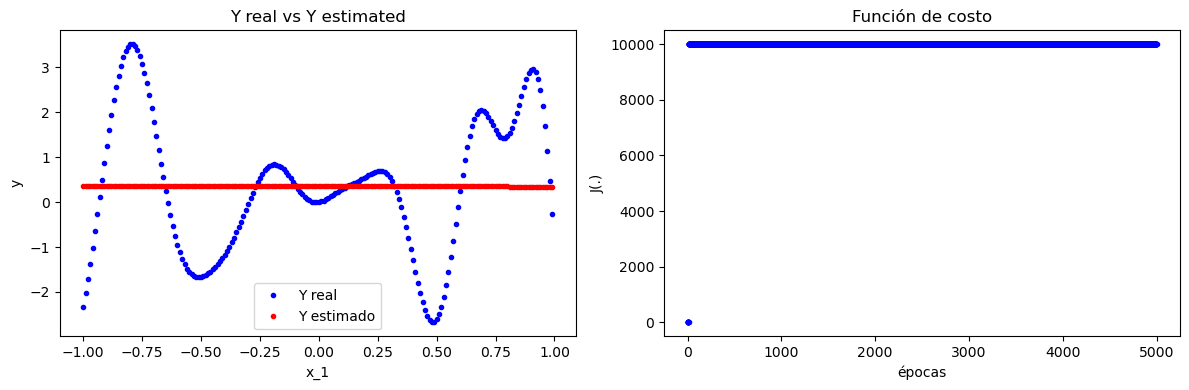

In [15]:


# Convertir la lista model.loss en un array NumPy
Jsave = model.loss

# Crear una figura con dos subtramas
plt.figure(figsize=(12, 4))

# Subtrama 1: Gráfico de Y real vs. Y estimado
plt.subplot(1, 2, 1)
plt.plot(X, Y, 'b.', label='Y real')
plt.plot(X, Y2, 'r.', label='Y estimado')
plt.xlabel('x_1')
plt.ylabel('y')
plt.title('Y real vs Y estimated')
plt.legend()

# Subtrama 2: Gráfico de la función de costo a lo largo de las épocas
plt.subplot(1, 2, 2)
epochs = np.arange(1, len(Jsave) + 1)
plt.plot(epochs, Jsave, 'b.')
plt.xlabel('épocas')
plt.ylabel('J(.)')
plt.title('Función de costo')

# Mostrar los gráficos
plt.tight_layout()
plt.show()
